No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


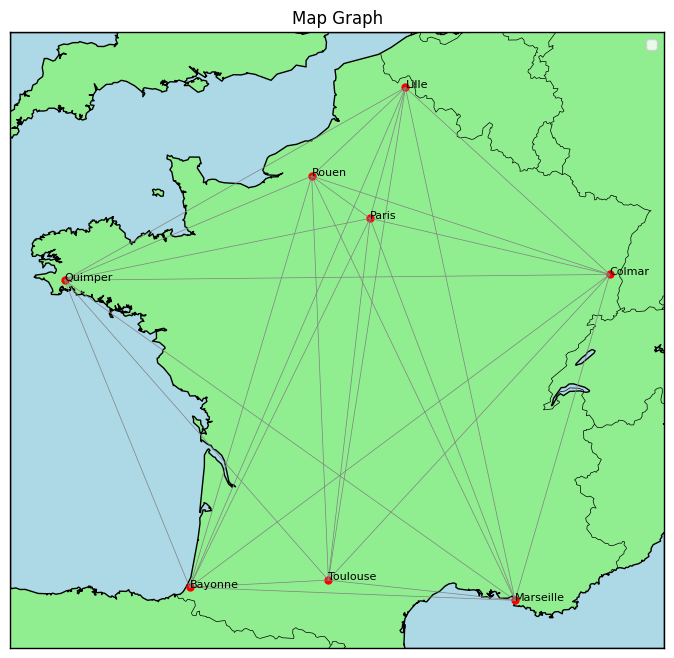

In [9]:
import sys
import numpy as np
import random
from Graphs.MapGraph import MapGraph

del sys.modules["Graphs"]
from Graphs.MapGraph import MapGraph

random.seed(0)
np,random.seed(0)

# graph = RandomGraph(node_number=40,min_weight=1,max_weight=100)
        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
graph = MapGraph(cities=cities,start_city="Rouen")

graph.plot_graph()

Removed 0 edges of 28
Costed 0 edges of 28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


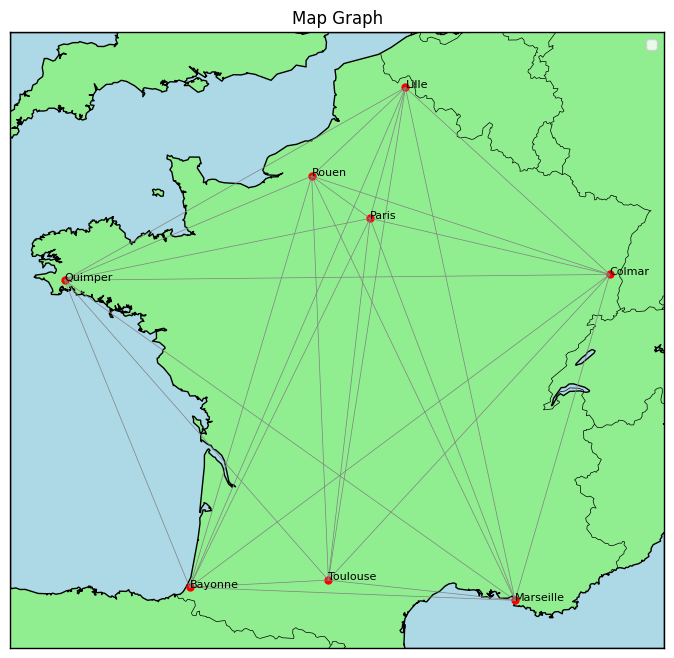

In [ ]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Algorithm ACO : 100 ants,5 vehicles : 



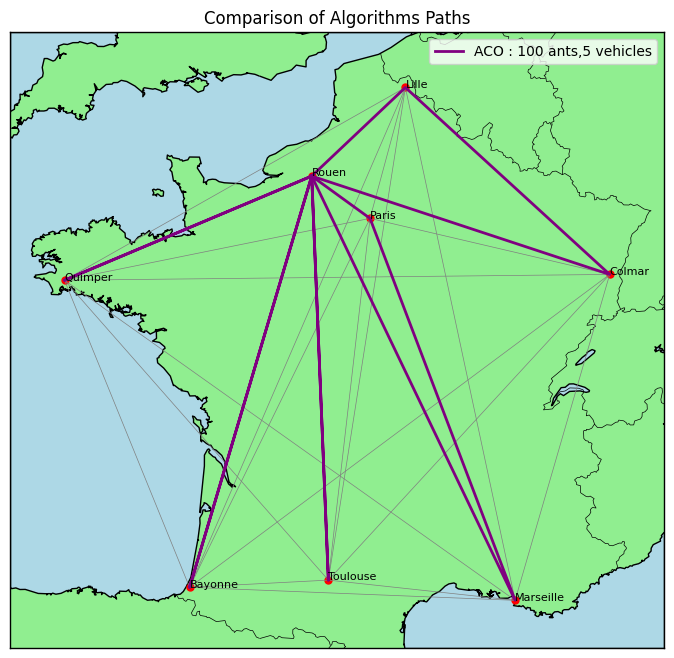

Best paths: [['Rouen', 'Bayonne', 'Rouen'], ['Rouen', 'Paris', 'Marseille', 'Rouen'], ['Rouen', 'Quimper', 'Rouen'], ['Rouen', 'Lille', 'Colmar', 'Rouen'], ['Rouen', 'Toulouse', 'Rouen']]
Total distance: 6133.141962088345
Number of iterations needed to find the solution : 14
Total number of iterations : 99
Algorithm Tabu Search : 



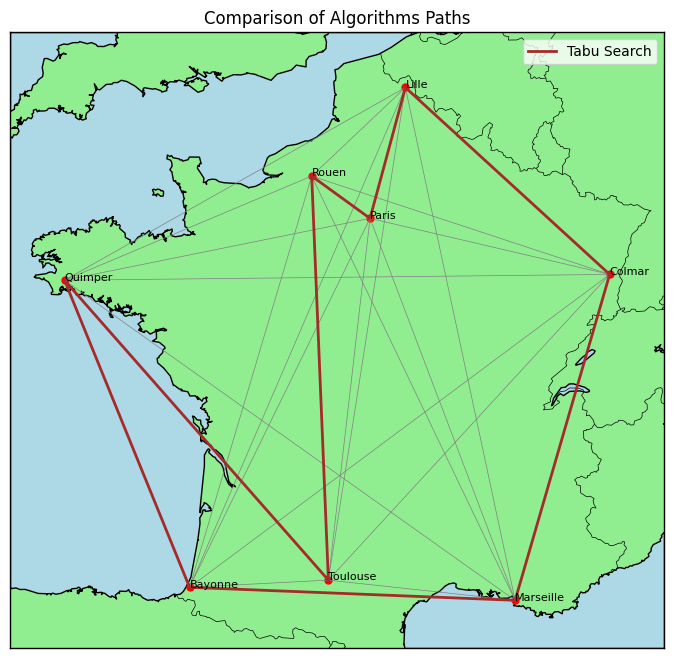

Best paths: [['Rouen', 'Paris', 'Lille', 'Colmar', 'Marseille', 'Bayonne', 'Quimper', 'Toulouse', 'Rouen']]
Total distance: 13395.305813394989
Number of iterations needed to find the solution : 67
Total number of iterations : 99
Algorithm Tabu Search, 2 vehicles : 



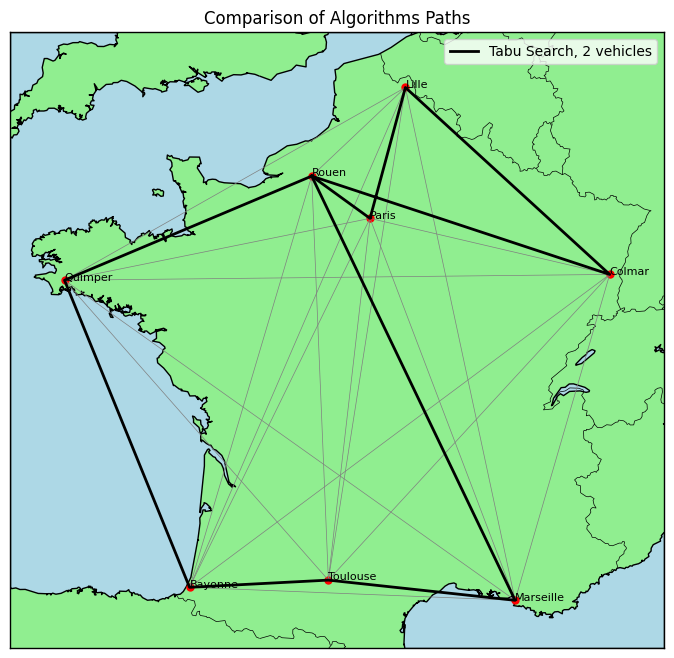

Best paths: [['Rouen', 'Quimper', 'Bayonne', 'Toulouse', 'Marseille', 'Rouen'], ['Rouen', 'Paris', 'Lille', 'Colmar', 'Rouen']]
Total distance: 8712.001181885207
Number of iterations needed to find the solution : 58
Total number of iterations : 99
Algorithm Genetic Algorithm : 



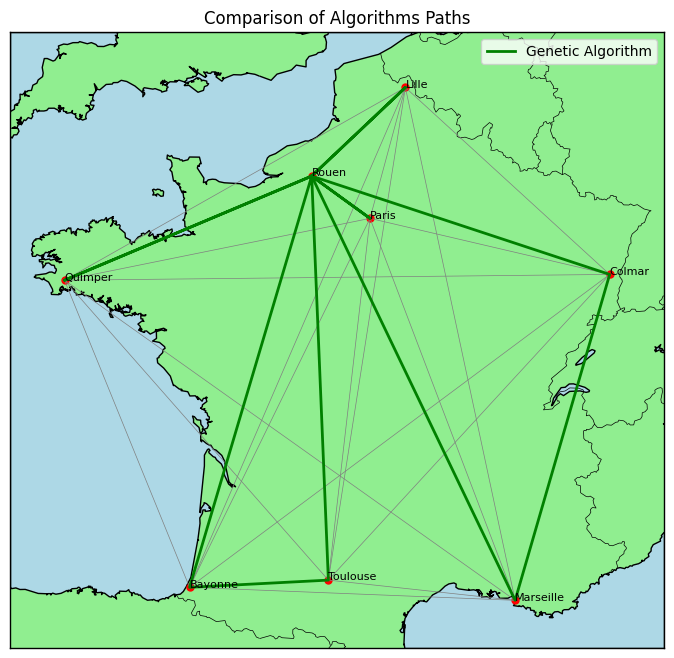

Best paths: [['Rouen', 'Paris', 'Rouen'], ['Rouen', 'Lille', 'Rouen'], ['Rouen', 'Quimper', 'Rouen'], ['Rouen', 'Colmar', 'Marseille', 'Rouen'], ['Rouen', 'Toulouse', 'Bayonne', 'Rouen']]
Total distance: 4803.741078067398
Number of iterations needed to find the solution : -1
Total number of iterations : 100


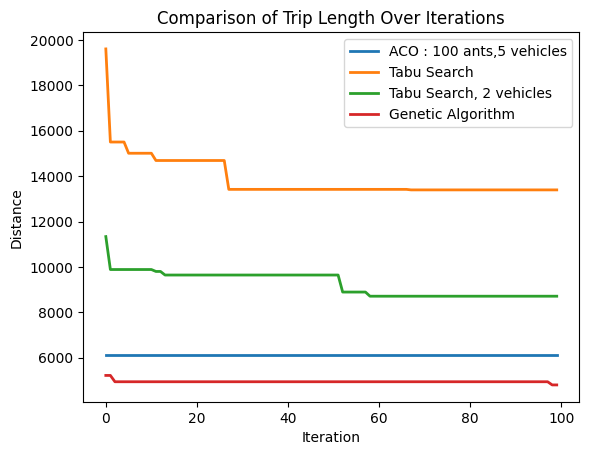

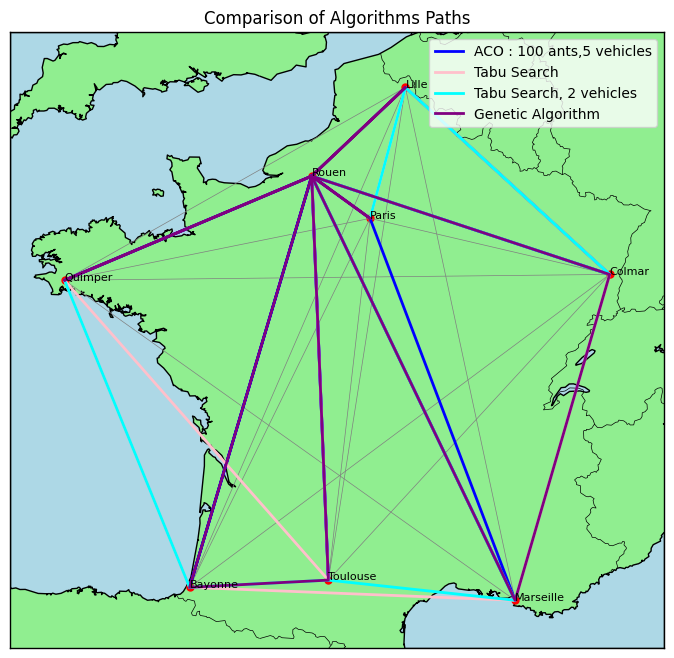

In [15]:
if "Algorithms.ACO.AcoAlgo" in sys.modules : del sys.modules["Algorithms.ACO.AcoAlgo"]
if "Algorithms.Greedy.GreedyAlgo" in sys.modules: del sys.modules["Algorithms.Greedy.GreedyAlgo"]
if "Algorithms.Tabu.TabuAlgo" in sys.modules: del sys.modules["Algorithms.Tabu.TabuAlgo"]
if "Algorithms.Genetic.GeneticAlgo" in sys.modules: del sys.modules["Algorithms.Genetic.GeneticAlgo"]
if "utils.plot" in sys.modules: del sys.modules["utils.plot"]

from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 100
convergence_threshold = 100
# ACO0 = AcoAlgo(graph=graph, name="ACO : 500 ants", num_ants=500, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO1 = AcoAlgo(graph=graph, name="ACO : 100 ants, 1 vehicule", num_ants=100, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO2 = AcoAlgo(graph=graph, name="ACO : 100 ants,2 vehicles", num_ants=100, num_vehicles=2,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO3 = AcoAlgo(graph=graph, name="ACO : 100 ants,3 vehicles", num_ants=100, num_vehicles=3,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO4 = AcoAlgo(graph=graph, name="ACO : 100 ants,4 vehicles", num_ants=100, num_vehicles=4,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO5 = AcoAlgo(graph=graph, name="ACO : 100 ants,5 vehicles", num_ants=100, num_vehicles=5,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU2 = TabuAlgo(graph=graph, name="Tabu Search, 2 vehicles", size_tabou=10, num_vehicles=2, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
GENETIC = GeneticAlgo(graph=graph, name="Genetic Algorithm") 
# GREEDY0 = GreedyAlgo(graph=graph, name= "Greedy Loop",min_iterations=min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [ACO5, TABU, TABU2, GENETIC]
run_algorithms(graph= graph,algorithms=algorithms)

#reset all datas
# del ACO0
# del ACO1
# del ACO2
# del ACO3
# del ACO4
del ACO5
del TABU
del TABU2
# del GREEDY0
del algorithms
del algorithms_distance_results
del algorithms_path_results

